# PWM Spectra

Jonathan Forhan

[Source](https://colab.research.google.com/drive/14lC8JcCz3ZeR8dxTCZHtWY6uUCtDbsEr#scrollTo=UBLLVutTP5x7)


## PWM Signal Definition

let $\alpha=$ duty cycle

$$
x\left(t\right) =
\left\{\begin{array}{cc}
1 &  |t| \leq \alpha \frac{T}{2}, \left\{−\frac{T}{2} \lt t \le \frac{T}{2}\right\} \\
-1 &  |t| \gt \alpha \frac{T}{2}, \left\{−\frac{T}{2} \lt t \le \frac{T}{2}\right\}
\end{array}\right.
$$

this piecewise function then repeats for each period infinitely,

or as a fourier series

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{jm\omega_0 t}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
N = 100


def get_c_m(duty_cycle):
    c_m = []
    for n in range(-N, N):
        if n == 0:
            c_m.append(0)
        else:
            c_m.append(2 * np.sin(n * PI * duty_cycle) / (n * PI))
    return c_m


def gen_sig(t, T, duty_cycle=0.5, c_m=None):
    a_0 = 2 * duty_cycle - 1    # DC component
    sig = a_0
    w_0 = 2*PI / T

    c_m = c_m if c_m else get_c_m(duty_cycle)

    for n in range(-N, N):
        sig += c_m[n + N] * np.exp(1j * n * w_0 * t).real # np.cos(w_0 * n * t)

    return sig

## PWM Spectra Derivation

$\textrm{let }\alpha = \textrm{ duty cycle}$

$\textrm{let }\beta = \frac12\alpha$

$\textrm{let }A = \textrm{ Amplitude}$

$$\large{x(t)=a_0+\displaystyle{\sum_{m=-\infty}^{\infty}}C_me^{jm\omega_0t}}$$

<br>

$$
\begin{aligned}
a_0&=\frac{1}{T_0}\left(\displaystyle{\int_0^{\alpha T_0}(A)dt+\int_{\alpha T_0}^{T_0}}(-A)dt\right) \\
a_0&=\frac{1}{T_0}\left(A(\alpha T_0)-A(T_0-\alpha T_0)\right) \\
&\textrm{factor out }T_0 \\
a_0&=A(\alpha)+A(-1+\alpha) \\
a_0&=A(2\alpha-1) \\
&\textrm{in our case }A\textrm{ is 1} \\
a_0&=2\alpha-1 \\
\end{aligned}
$$

<br>

$$
\begin{aligned}
C_m&=\frac{2A}{T_0}\displaystyle{\int_{-\beta T_0}^{\beta T_0}}x(t)\space e^{-jm\omega_0t}dt \\
C_m&=\frac{2}{T_0}\frac{1}{-jm\omega_0}e^{-jm\omega_0t}\bigg\vert_{-\beta T_0}^{\beta T_0} \\
C_m&=\frac{2}{-jm\omega_0T_0}\left(e^{-jm\omega_0\beta T_0}-e^{jm\omega_0\beta T_0}\right) \\
C_m&=\frac{2}{-jm\omega_0T_0}\left(e^{-jm\omega_0\beta T_0}-e^{jm\omega_0\beta T_0}\right)\times\frac{2j}{2j} \\
C_m&=\frac{4}{m\omega_0T_0}\left(\frac{e^{jm\omega_0\beta T_0}+e^{-jm\omega_0\beta T_0}}{2j}\right) \\
C_m&=\frac{2}{m\pi}\sin(m\pi\alpha) \\
\end{aligned}
$$

<br>

$$\textrm{thus}$$

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{j m\omega_0t}$$

<br>
<br>

$\textrm{let }f = 2078051 \textrm{ (my student ID)}$

$\textrm{let }T_0 = \frac{1}{f} = 481\times10^{-9}$

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{jmt(13.1\times10^{6})}$$

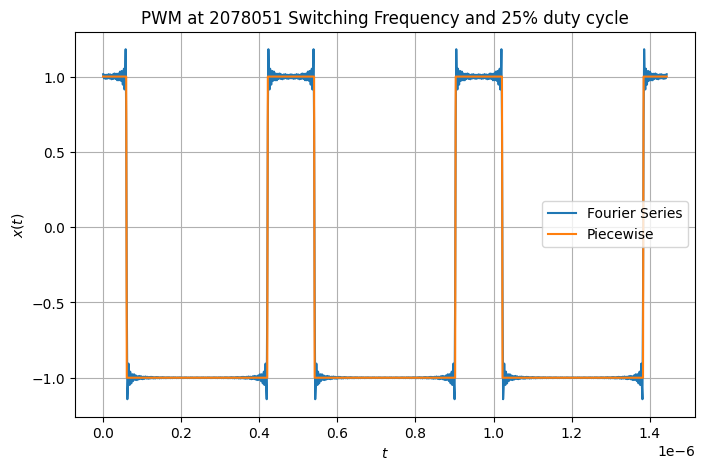

In [ ]:
# @title Plot of the square wave with a frequency of my student ID

plt.clf
plt.figure(figsize=(8, 5))
plt.title('PWM at 2078051 Switching Frequency and 25% duty cycle')
plt.grid(True)
plt.ylabel('$x(t)$')
plt.xlabel('$t$')

f = 2078051
T = 1 / f

x = np.linspace(0, T*3, 1000)

y = [gen_sig(t, T, duty_cycle=0.25) for t in x]
plt.plot(x, y, label='Fourier Series')

def simple_sig(t, T, duty_cycle):
    if t % T > T/2: # get both sides of period
        t %= -T
    else:
        t %= T
    t = np.abs(t)
    return 1 if t <= duty_cycle * T / 2 else -1


y = [simple_sig(t, T, duty_cycle=0.25) for t in x]
plt.plot(x, y, label='Piecewise')


plt.legend(loc='best')
plt.show()

<ipython-input-91-5a5da9f770f5>:27: RuntimeWarning: divide by zero encountered in log10
  plt.stem(n_s, 20*np.log10(np.abs(c_signal)), 'g', label='Magnitude', bottom=-100)


<Figure size 640x480 with 0 Axes>

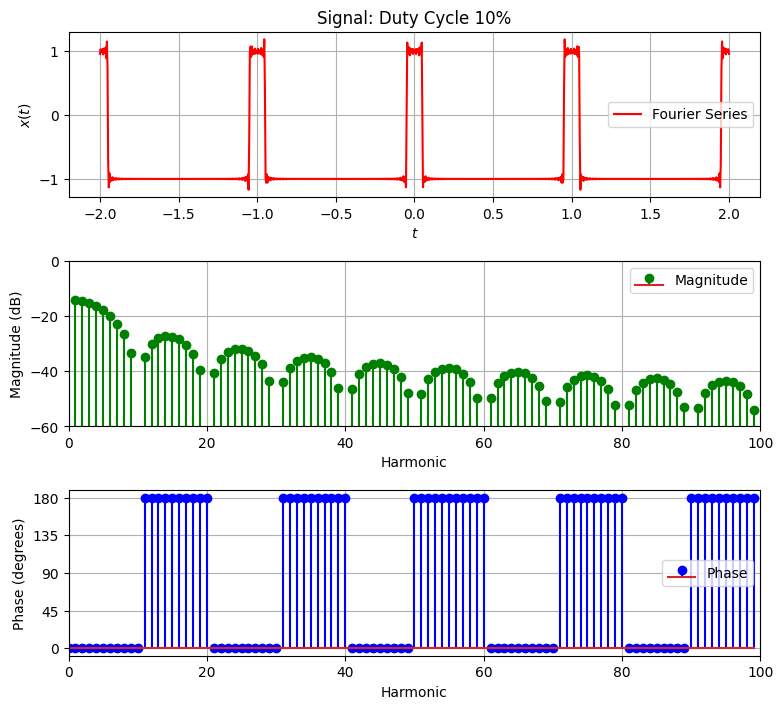

<Figure size 640x480 with 0 Axes>

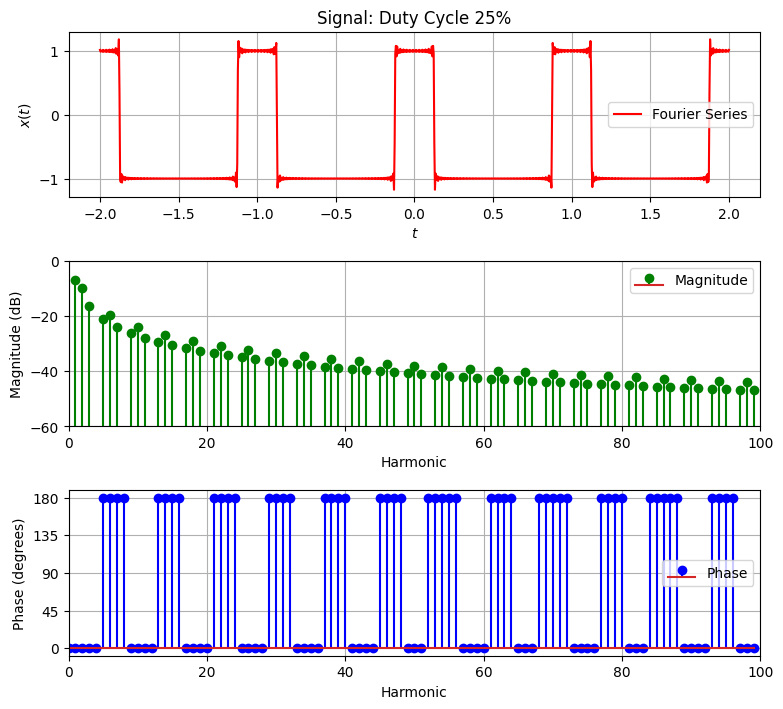

<Figure size 640x480 with 0 Axes>

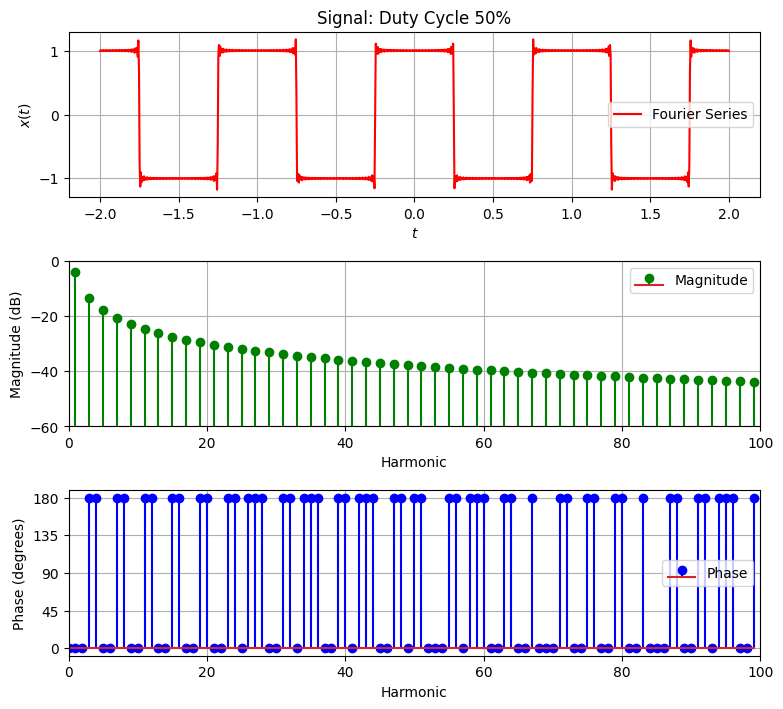

<Figure size 640x480 with 0 Axes>

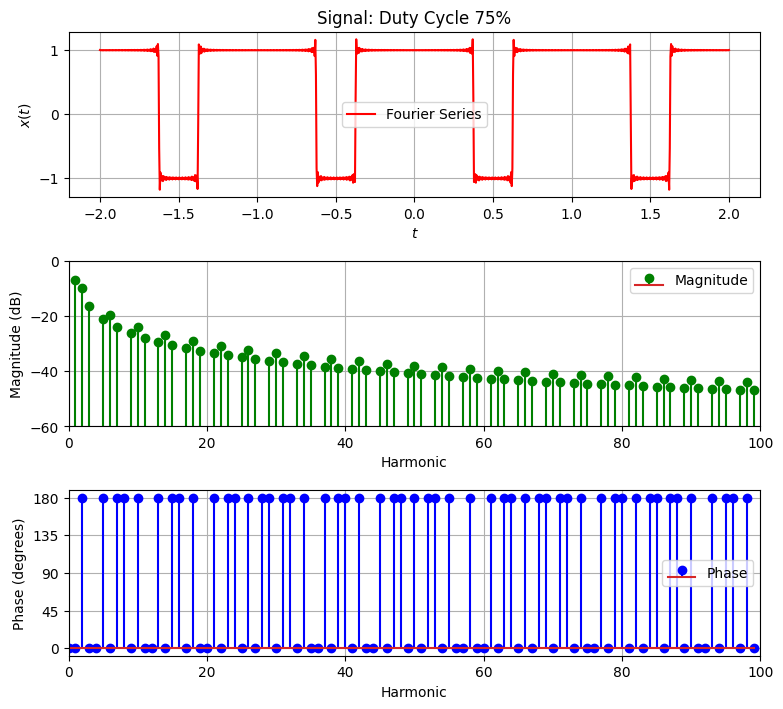

<Figure size 640x480 with 0 Axes>

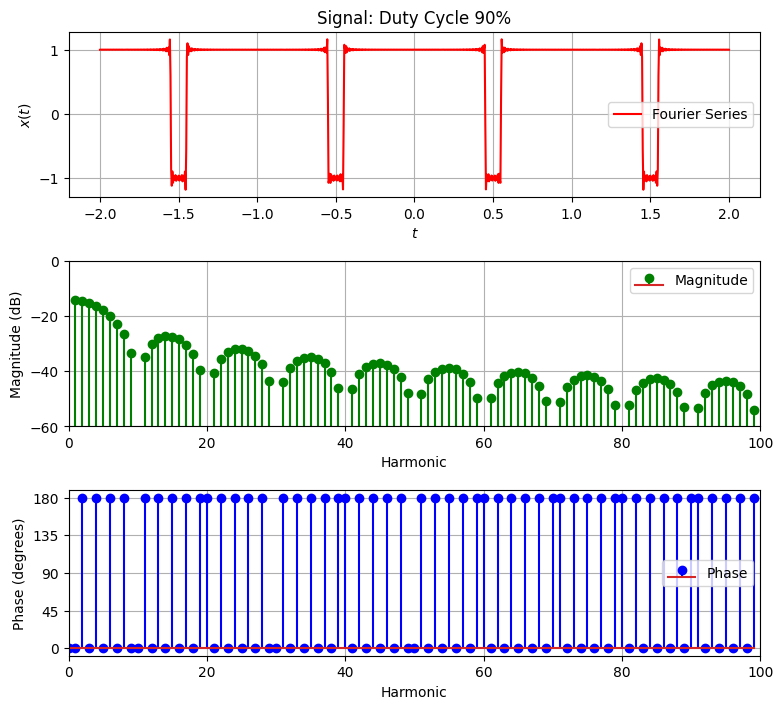

<Figure size 640x480 with 0 Axes>

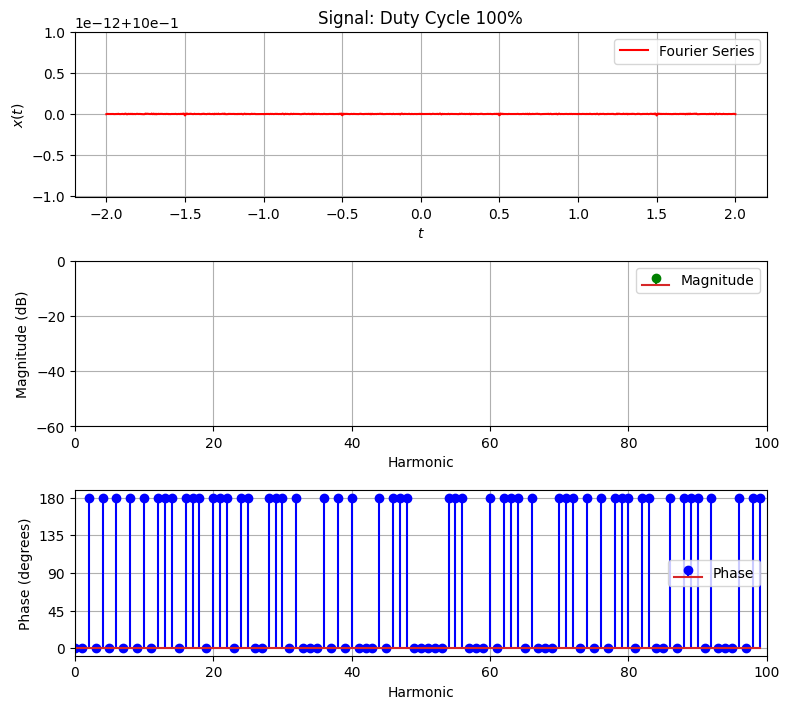

In [ ]:
# @title Square waves with varied duty cycles of 10%, 25%, 50%, 75%, 90%, and 100%

duty_cycles = [0.1, 0.25, 0.5, 0.75, 0.90, 1.0]

for duty_cycle in duty_cycles:
    plt.clf()

    c_signal = get_c_m(duty_cycle)

    x = np.linspace(-2, 2, 1000)
    y = [gen_sig(t, T=1, duty_cycle=duty_cycle, c_m=c_signal) for t in x]
    n_s = np.arange(0, N)

    c_signal = c_signal[N:]

    plt.figure(figsize=(8, 7))

    plt.subplot(311)
    plt.plot(x, y, 'r', label='Fourier Series')
    plt.grid(True)
    plt.tight_layout()
    plt.ylabel('$x(t)$')
    plt.xlabel('$t$')
    plt.legend(loc='best')
    plt.title('Signal: Duty Cycle %d%%' % (duty_cycle * 100))

    plt.subplot(312)
    plt.stem(n_s, 20*np.log10(np.abs(c_signal)), 'g', label='Magnitude', bottom=-100)
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('Harmonic')
    plt.ylabel('Magnitude (dB)')
    plt.axis([0, 100, -60, 0])
    plt.legend(loc='best')

    plt.subplot(313)
    plt.stem(n_s, 180/np.pi*np.angle(c_signal), 'b', label='Phase')
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('Harmonic')
    plt.ylabel('Phase (degrees)')
    plt.xlim([0, 100])
    plt.yticks(np.arange(0, 181, 45))
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

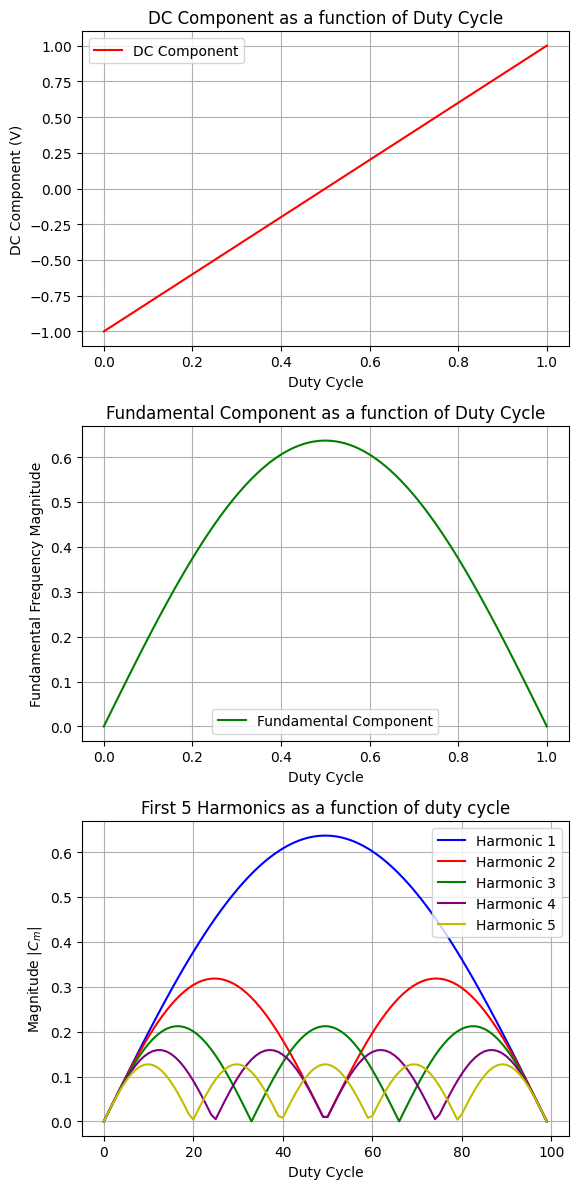

In [ ]:
# @title DC component, fundamental frequency, and the first 5 harmonics as a function of duty cycle (1-100)%

plt.clf()
plt.figure(figsize=(6,12))

# DC component
def get_dc(duty_cycle):
    return 2 * duty_cycle - 1

x = np.linspace(0, 1.0, 100)

dc = [get_dc(d) for d in x]

plt.subplot(311)
plt.grid(True)
plt.plot(x, dc, 'r', label='DC Component')
plt.ylabel('DC Component (V)')
plt.xlabel('Duty Cycle')
plt.legend(loc='best')
plt.title('DC Component as a function of Duty Cycle')
plt.tight_layout()


# Fundamental Frequency / 1st harmonic
ff =  [get_c_m(d)[N+1] for d in x]

plt.subplot(312)
plt.grid(True)
plt.plot(x, np.abs(ff), 'g', label='Fundamental Component')
plt.ylabel('Fundamental Frequency Magnitude')
plt.xlabel('Duty Cycle')
plt.legend(loc='best')
plt.title('Fundamental Component as a function of Duty Cycle')
plt.tight_layout()


# First 5 Harmonics
c_ms = [get_c_m(d) for d in x]          # get harmonics
c_ms = [c_m[N+1:N+6] for c_m in c_ms]   # trim to 5
harmonics = list(zip(*c_ms)) # unzip // (N lists of 5 to 5 lists of N)


colors = ['b', 'r', 'g', 'purple', 'y']
n_s = np.arange(0, N)

plt.subplot(313)
plt.grid(True)
plt.ylabel('Magnitude $|C_m|$')
plt.xlabel('Duty Cycle')
plt.title('First 5 Harmonics as a function of duty cycle')
plt.tight_layout()

for i in range(5):
    plt.plot(n_s, np.abs(harmonics[i]), colors[i], label='Harmonic %d' % (i+1))

plt.legend(loc='best')

plt.show()

## External Resources

- [Swarthmore College Fourier Series](https://lpsa.swarthmore.edu/Fourier/Series/ExFS.html)